In [1]:
 !pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\USER\AppData\Local\Temp\pip-install-prnk90qy\tensorflow-gpu_43067cb773254a64971f820683a86488\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
accelerate                    0.24.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         23.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
b

In [7]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
data_dir=os.path.join("data")

In [11]:
data_dir

'data'

In [12]:
alpha_list=[]
for folders in os.listdir(data_dir):
    alpha_dir=os.path.join("data",folders)
    alpha_list=os.listdir(alpha_dir)
alpha_list

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [13]:
count = []

for alphabet in alpha_list:
    # print(os.listdir(os.path.join(data_dir,"small",alphabet)))
#     print(alphabet)
    count.append(len(os.listdir(os.path.join(data_dir, "small", alphabet))))
    for image in os.listdir(os.path.join(data_dir, "small", alphabet)):
        image_path=os.path.join(data_dir, "small", alphabet, image)
len(count)

26

In [34]:
min(count)

1920

In [35]:
## image cleaning

In [36]:
import cv2
import imghdr

In [37]:
image_ext = ['jpeg','jpg', 'bmp', 'png']

In [44]:
for alphabet in alpha_list:
    # print(os.listdir(os.path.join(data_dir,"small",alphabet)))
#     print(alphabet)
#     count.append(len(os.listdir(os.path.join(data_dir, "small", alphabet))))
    i=0
    for image in os.listdir(os.path.join(data_dir, "small", alphabet)):
        image_path=os.path.join(data_dir, "small", alphabet, image)
        if i < 1900:
            i+=1
        else:
            os.remove(image_path)

In [14]:
updated_count=[]

In [15]:
for alphabet in alpha_list:
    # print(os.listdir(os.path.join(data_dir,"small",alphabet)))
#     print(alphabet)
    updated_count.append(len(os.listdir(os.path.join(data_dir, "small", alphabet))))
    for image in os.listdir(os.path.join(data_dir, "small", alphabet)):
        image_path=os.path.join(data_dir, "small", alphabet, image)
updated_count[0]*26

49400

In [50]:
##load data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data=tf.keras.utils.image_dataset_from_directory(os.path.join("data","small"))

Found 49400 files belonging to 26 classes.


In [18]:
type(data)

tensorflow.python.data.ops.batch_op._BatchDataset

In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

In [21]:
batch[0]

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

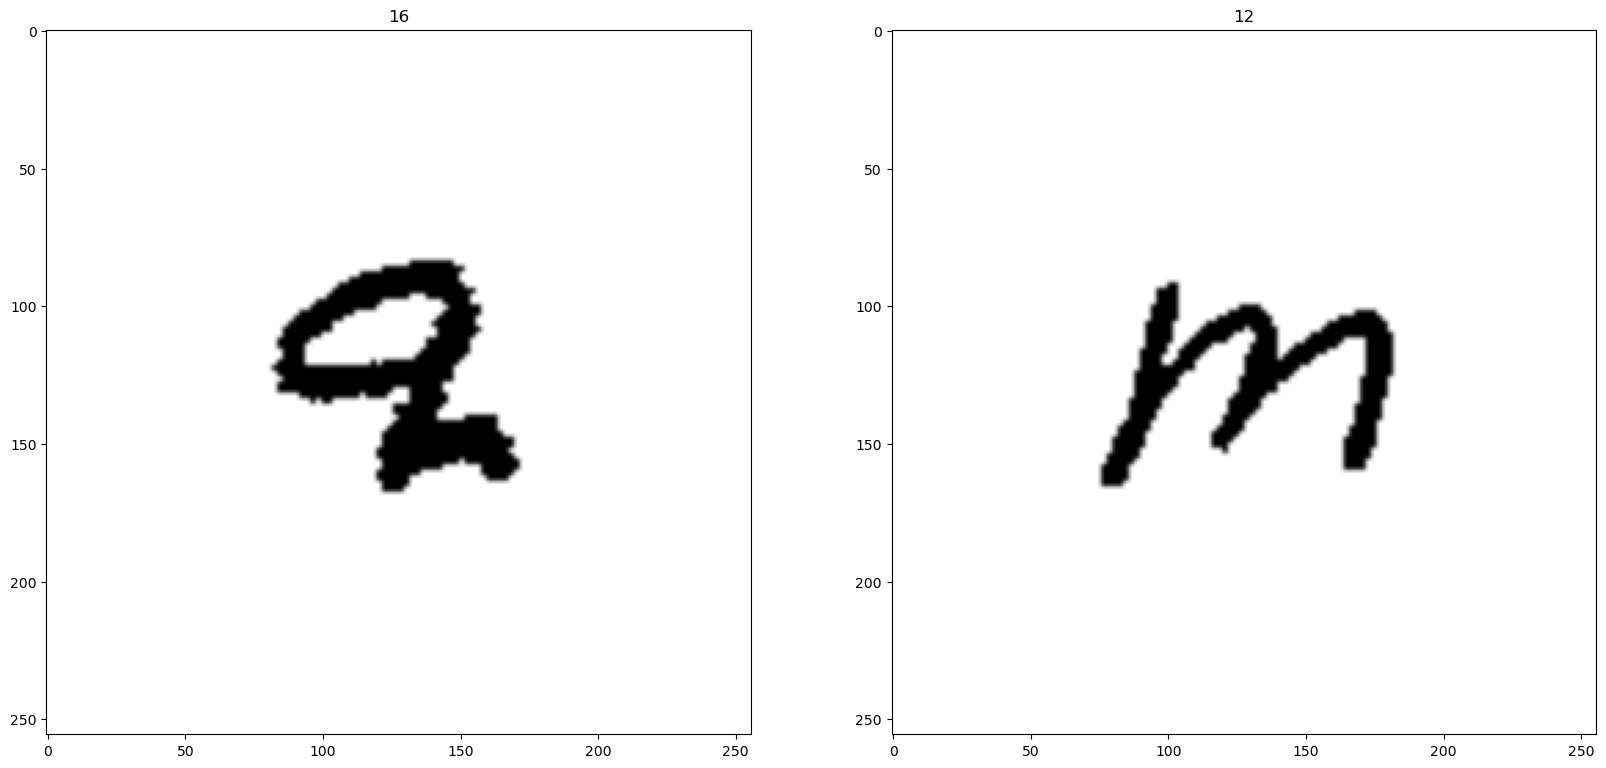

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(20,20))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
alpha_list[12]

'm'

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [26]:
type(data)

tensorflow.python.data.ops.map_op._MapDataset

In [27]:
len(data)

1544

In [78]:
len(batch)

2

In [28]:
len(data)*.2

308.8

In [29]:
len(data)*.1

154.4

In [30]:
len(data)*.7

1080.8

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [32]:
val_size+train_size+test_size

1544

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(train)

1080

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [36]:
model = Sequential()

In [66]:
model = Sequential([
    Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Dropout(rate=0.4),
    
    Conv2D(8, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    
    Conv2D(4, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
#     Dropout(rate=0.3),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(rate=0.4),
    BatchNormalization(),
    
    Dense(128, activation='relu'),
    Dropout(rate=0.4),
    BatchNormalization(),
    
    Dense(64, activation='relu'),
    Dropout(rate=0.4),
    BatchNormalization(),
    
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [67]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 127, 127, 16)      0         
                                                                 
 conv2d_42 (Conv2D)          (None, 125, 125, 8)       1160      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 62, 62, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 60, 60, 4)       

In [68]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [72]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
1080/1080 [==============================] - 744s 688ms/step - loss: 0.7696 - accuracy: 0.7719 - val_loss: 0.4294 - val_accuracy: 0.8732 - lr: 0.0010
Epoch 2/20
1080/1080 [==============================] - 747s 691ms/step - loss: 0.7262 - accuracy: 0.7854 - val_loss: 0.3753 - val_accuracy: 0.8876 - lr: 0.0010
Epoch 3/20
1080/1080 [==============================] - 743s 688ms/step - loss: 0.6782 - accuracy: 0.8005 - val_loss: 0.3868 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 4/20
1080/1080 [==============================] - 749s 693ms/step - loss: 0.6575 - accuracy: 0.8058 - val_loss: 0.3315 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 5/20
1080/1080 [==============================] - 746s 691ms/step - loss: 0.6209 - accuracy: 0.8179 - val_loss: 0.3337 - val_accuracy: 0.9002 - lr: 0.0010
Epoch 6/20
1080/1080 [==============================] - 744s 688ms/step - loss: 0.6016 - accuracy: 0.8228 - val_loss: 0.3232 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 7/20
1080/1080 [============

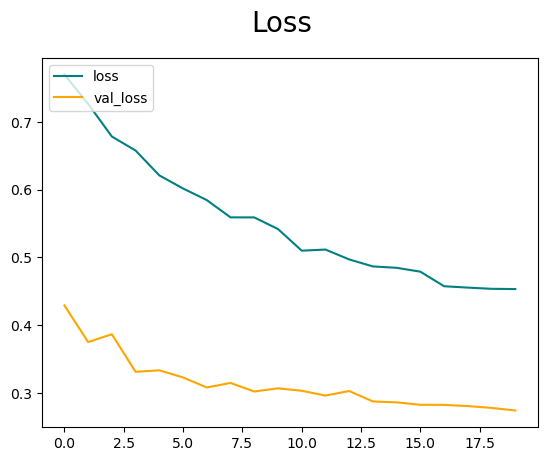

In [73]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

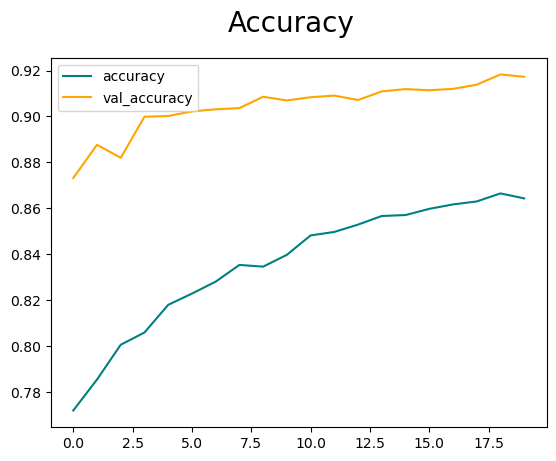

In [74]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [103]:
##evaluate

In [160]:
from tensorflow.keras.metrics import Precision, Recall

In [161]:
pre = Precision()
re = Recall()

In [87]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
#     print(yhat.shape)
#     print(y.shape)
    predicted_classes = np.argmax(yhat, axis=1)
#     print("********")
#     print(predicted_classes.shape)
    pre.update_state(y, predicted_classes)
    re.update_state(y,  predicted_classes)

1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 98ms/step


In [163]:
print(pre.result(), re.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [89]:
##testing

In [117]:
import cv2

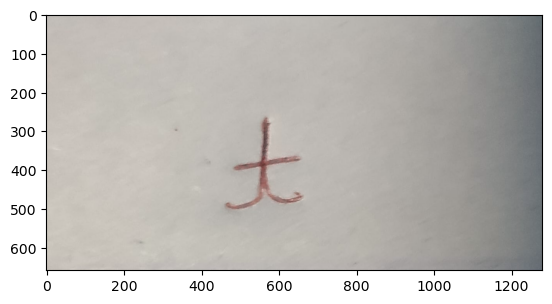

In [168]:
img = cv2.imread("testing.jpg")
plt.imshow(img)

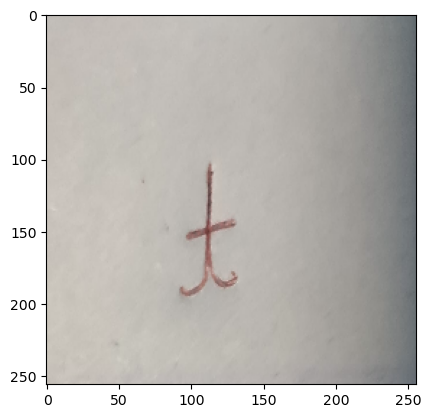

In [169]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [170]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 24ms/step


In [171]:
predicted_classes = np.argmax(yhat, axis=1)
alpha_list[predicted_classes[0]]

'i'